In [63]:
import pandas as pd
import tensorflow as tf
import tensorflow_gnn as tfgnn
import networkx as nx
import numpy as np


In [64]:
# Read in and observe the graph data and label it

data = pd.read_csv('graph_example.csv')
data['label'] = 1
print(data.head())
print(data.tail())


   Unnamed: 0  source  target  label
0      220498    3813    3798      1
1      220500    3813    3801      1
2      220502    3813    3802      1
3      220504    3813    3803      1
4      220506    3813    3806      1
    Unnamed: 0  source  target  label
76      220650    3815    3786      1
77      220652    3815    3787      1
78      220654    3815    3788      1
79      220656    3815    3790      1
80      220658    3815    3792      1


Graph with 53 nodes and 81 edges


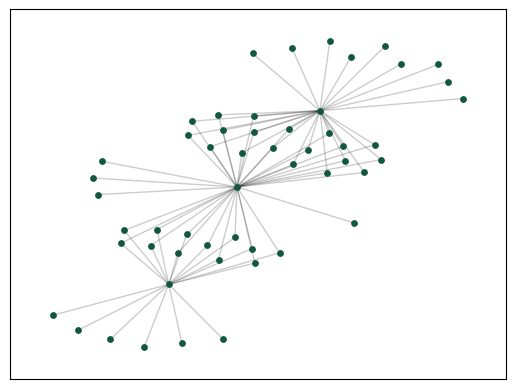

In [65]:
# Create a Graph
G = nx.from_pandas_edgelist(data, source='source',target='target')

# Printing a networkX graph returns counts of nodes and edges.
print(G)

# Use NetworkX to visualize data
pos = nx.spring_layout(G, seed=1987)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(),
                       node_color='#115740', node_size=15)

In [66]:
# Access elements of the graph
print(G.nodes)
print(G.edges)

[3813, 3798, 3801, 3802, 3803, 3806, 3807, 3808, 3809, 3810, 3811, 3816, 3819, 3820, 3822, 3823, 3826, 3827, 3828, 3814, 3759, 3760, 3763, 3765, 3768, 3769, 3773, 3774, 3775, 3776, 3778, 3779, 3780, 3782, 3784, 3787, 3788, 3790, 3792, 3793, 3794, 3795, 3817, 3815, 3758, 3761, 3762, 3766, 3767, 3770, 3772, 3783, 3786]
[(3813, 3798), (3813, 3801), (3813, 3802), (3813, 3803), (3813, 3806), (3813, 3807), (3813, 3808), (3813, 3809), (3813, 3810), (3813, 3811), (3813, 3816), (3813, 3819), (3813, 3820), (3813, 3822), (3813, 3823), (3813, 3826), (3813, 3827), (3813, 3828), (3798, 3814), (3801, 3814), (3803, 3814), (3806, 3814), (3810, 3814), (3811, 3814), (3816, 3814), (3819, 3814), (3820, 3814), (3826, 3814), (3827, 3814), (3828, 3814), (3814, 3759), (3814, 3760), (3814, 3763), (3814, 3765), (3814, 3768), (3814, 3769), (3814, 3773), (3814, 3774), (3814, 3775), (3814, 3776), (3814, 3778), (3814, 3779), (3814, 3780), (3814, 3782), (3814, 3784), (3814, 3787), (3814, 3788), (3814, 3790), (3814, 3

In [67]:
#Transform to a TensorFlow Record compatiable data type
def _int64_feature(value):
      """Returns an int64_list from a bool / enum / int / uint."""
      return tf.train.Feature(int64_list=tf.train.Int64List(value=value))


def format_features(G,label):
      # Define the features of the graph 
      feature = {'edges.#size': _int64_feature(np.array([len(G.edges)])),
         'edges.#target':_int64_feature(np.array([i[1] for i in G.edges])),
         'nodes.#size': _int64_feature(np.array([len(G.nodes)])),
         'edges.#source': _int64_feature(np.array([i[0] for i in G.edges])),
         'context/label': _int64_feature(label),
         'edges.hidden_state': _int64_feature([0]), 
         'nodes.hidden_state': _int64_feature([0]) 
      }
      # Create a tensorflow Example 
      example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
      # Serialize the example to a string for writing into the TensorFlow Record
      example_proto = example_proto.SerializeToString()

      return example_proto, feature



In [68]:
filename = 'project.tfrecord'
label = np.array([1])

# with tf.io.TFRecordWriter(filename) as writer:
#    for i in range(len(graphs)):
#       example = format_features(graphs[i],label_array[i])
#       writer.write(example)

with tf.io.TFRecordWriter(filename) as writer:
   example, feature = format_features(G,label)
   writer.write(example)

print(feature)

{'edges.#size': int64_list {
  value: 81
}
, 'edges.#target': int64_list {
  value: 3798
  value: 3801
  value: 3802
  value: 3803
  value: 3806
  value: 3807
  value: 3808
  value: 3809
  value: 3810
  value: 3811
  value: 3816
  value: 3819
  value: 3820
  value: 3822
  value: 3823
  value: 3826
  value: 3827
  value: 3828
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3814
  value: 3759
  value: 3760
  value: 3763
  value: 3765
  value: 3768
  value: 3769
  value: 3773
  value: 3774
  value: 3775
  value: 3776
  value: 3778
  value: 3779
  value: 3780
  value: 3782
  value: 3784
  value: 3787
  value: 3788
  value: 3790
  value: 3792
  value: 3793
  value: 3794
  value: 3795
  value: 3817
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
  value: 3815
 

In [69]:
print(example)

b'\n\xf8\x03\n\x14\n\x0bedges.#size\x12\x05\x1a\x03\n\x01Q\n\x14\n\x0bnodes.#size\x12\x05\x1a\x03\n\x015\n\x1b\n\x12edges.hidden_state\x12\x05\x1a\x03\n\x01\x00\n\x16\n\rcontext/label\x12\x05\x1a\x03\n\x01\x01\n\xba\x01\n\redges.#target\x12\xa8\x01\x1a\xa5\x01\n\xa2\x01\xd6\x1d\xd9\x1d\xda\x1d\xdb\x1d\xde\x1d\xdf\x1d\xe0\x1d\xe1\x1d\xe2\x1d\xe3\x1d\xe8\x1d\xeb\x1d\xec\x1d\xee\x1d\xef\x1d\xf2\x1d\xf3\x1d\xf4\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xe6\x1d\xaf\x1d\xb0\x1d\xb3\x1d\xb5\x1d\xb8\x1d\xb9\x1d\xbd\x1d\xbe\x1d\xbf\x1d\xc0\x1d\xc2\x1d\xc3\x1d\xc4\x1d\xc6\x1d\xc8\x1d\xcb\x1d\xcc\x1d\xce\x1d\xd0\x1d\xd1\x1d\xd2\x1d\xd3\x1d\xe9\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xe7\x1d\xae\x1d\xb1\x1d\xb2\x1d\xb6\x1d\xb7\x1d\xba\x1d\xbc\x1d\xc7\x1d\xca\x1d\n\xba\x01\n\redges.#source\x12\xa8\x01\x1a\xa5\x01\n\xa2\x01\xe5\x1d\xe5\x1d\xe5\